In [21]:
import tensorflow as tf
import json
from tensorflow import keras
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import f1_score, accuracy_score, balanced_accuracy_score
import numpy as np
from matplotlib import pyplot as plt
import json
import pandas as pd
import os
from pathlib import Path

ModuleNotFoundError: No module named 'Preprocessing'

In [7]:
models_path = os.path.join(Path.cwd().parent, "Results", "WHOI", "Final")
vgg_path = os.path.join(models_path, "vgg19")
conv_path = os.path.join(models_path, "convnext")
sb_path = os.path.join(models_path, "sb_cnn")


vgg = {"TEST_DATA": os.path.join(vgg_path, "test_dataset"),
       "MODEL": os.path.join(vgg_path, "FINAL.h5"),
       "MAPPING": os.path.join(vgg_path, "mapping.json"),
       "PARAMS": os.path.join(vgg_path, "settings.json")
}


convnext = {"TEST_DATA": os.path.join(conv_path, "test_dataset"),
            "MODEL": os.path.join(conv_path, "FINAL"),
            "MAPPING": os.path.join(conv_path, "mapping.json"),
            "PARAMS": os.path.join(conv_path, "settings.json")
}

sb = {"TEST_DATA": os.path.join(sb_path, "test_dataset"),
      "MODEL": os.path.join(sb_path, "FINAL"),
      "MAPPING": os.path.join(sb_path, "mapping.json"),
      "PARAMS": os.path.join(sb_path, "settings.json")
}

model = sb

TEST_DATA = model["TEST_DATA"]
MODEL = model["MODEL"]
PARAMS = model["PARAMS"]
MAPPING = model["MAPPING"]

test_ds = tf.data.Dataset.load(TEST_DATA)
test_batches = test_ds.batch(batch_size=16)
model = keras.models.load_model(MODEL)

f = open(MAPPING)
mapping = json.load(f)

f = open(PARAMS)
params = json.load(f)


y_test = tf.concat(list(test_batches.map(lambda values, labels: labels)), axis=0)
x_test = tf.concat(list(test_batches.map(lambda values, labels: values)), axis=0)

### Model parameters

In [8]:
params

{'batch_size': 16,
 'learning_rate': 0.0001,
 'error_func': 'sparse_categorical_crossentropy',
 'epochs': 200}

In [9]:
y_score = model.predict(x_test)
y_pred = np.argmax(y_score, axis=1)

11/11 [==============================] - 50s 4s/step


### Single value evaluation metrics

In [11]:
res = {
       "f1": f1_score(y_true=y_test, y_pred=y_pred, average="weighted"),
       "accuracy": accuracy_score(y_true=y_test, y_pred=y_pred), 
       "bal_accuracy": balanced_accuracy_score(y_true=y_test, y_pred=y_pred)}
res

{'f1': 0.8387961729900332,
 'accuracy': 0.8407079646017699,
 'bal_accuracy': 0.8545435318927604}

### Confusion Matrix

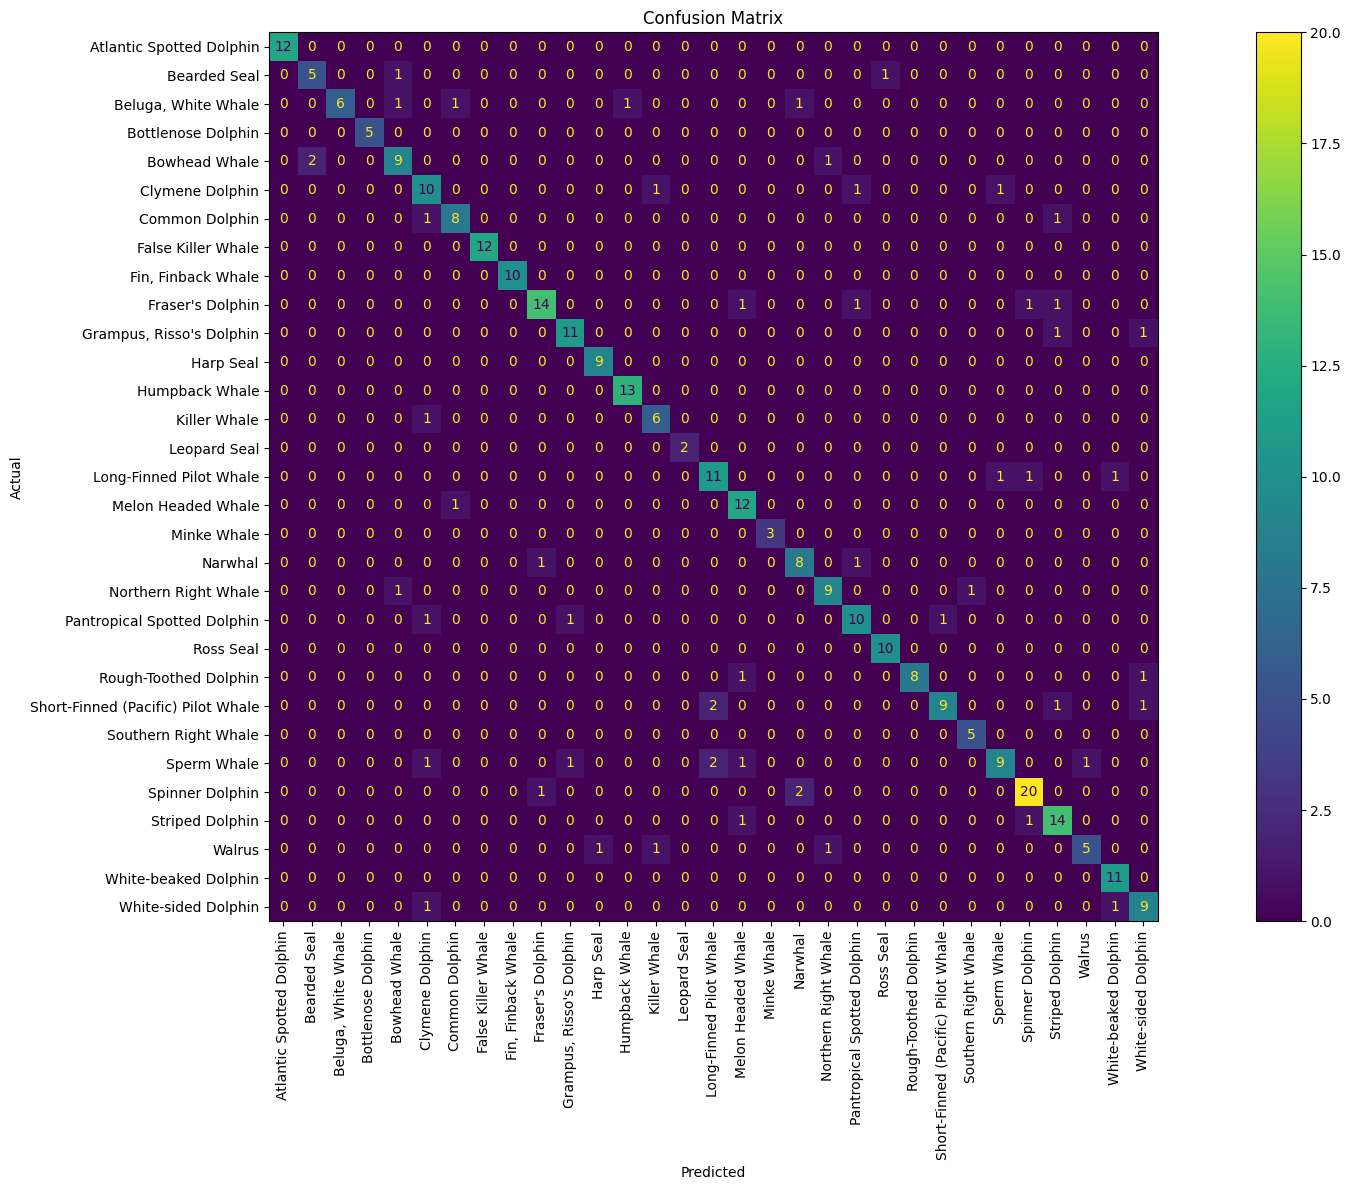

In [12]:
matrix = ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                                 y_pred=y_pred, 
                                                 display_labels=mapping, 
                                                 xticks_rotation="vertical")

matrix.ax_.set_title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.gcf().set_size_inches(20,12)
plt.tight_layout()
plt.show()


### F1-score per species

In [7]:
cr = pd.DataFrame(classification_report(y_true=y_test, 
                                        y_pred=y_pred, 
                                        output_dict=True,
                                        target_names=mapping))
cr = cr.transpose()[:-3]

cr[["f1-score"]].sort_values(by="f1-score").round(2)


C:\Users\Magnus\miniconda3\envs\piptensor39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Magnus\miniconda3\envs\piptensor39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Magnus\miniconda3\envs\piptensor39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

,f1-score
Atlantic Spotted Dolphin,0.00
Walrus,0.00
Striped Dolphin,0.00
Sperm Whale,0.00
Southern Right Whale,0.00
Short-Finned (Pacific) Pilot Whale,0.00
Rough-Toothed Dolphin,0.00
Ross Seal,0.00
Pantropical Spotted Dolphin,0.00
Northern Right Whale,0.00
